In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../datasets/CPT.csv")
df

,question_text,input_outputs,website,num_words,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,num_tags
0,This is the hard version of the problem. The o...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,codeforces,319,data structures,dfs and similar,divide and conquer,dp,math,trees,NaN,6
1,This is the simple version of the problem. The...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,codeforces,316,data structures,dfs and similar,dp,graphs,greedy,math,trees,7
2,You are given an array a consisting of n zeros...,Input: ['65 51 24 51 51 32 45531244 21 14 4223...,codeforces,182,binary search,brute force,data structures,two pointers,NaN,NaN,NaN,4
3,Timofey has an apple tree growing in his garde...,Input: ['251 23 45 33 243 45 14 41 331 21 331 ...,codeforces,243,combinatorics,dfs and similar,dp,math,trees,NaN,NaN,5
4,Vanya really likes math. One day when he was s...,Input: ['63103711000000000000000015'] Output:[...,codeforces,167,bitmasks,combinatorics,math,trees,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10594,You are given a string of length 5 called time...,"Input: time = ""?5:00""\nOutput: 2\n",leetcode,84,string,enumeration,NaN,NaN,NaN,NaN,NaN,2
10595,Given the heads of two singly linked-lists hea...,"Input: intersectVal = 8, listA = [4,1,8,4,5], ...",leetcode,194,hash-table,linked-list,two-pointers,NaN,NaN,NaN,NaN,3
10596,"Given a string of digits s, return the number ...","Input: s = ""103301""\nOutput: 2\n",leetcode,68,string,dynamic-programming,NaN,NaN,NaN,NaN,NaN,2
10597,You are given a series of video clips from a s...,"Input: clips = [[0,2],[4,6],[8,10],[1,9],[1,5]...",leetcode,111,array,dynamic-programming,greedy,NaN,NaN,NaN,NaN,3


## Extract Algorithm Tags

In [ ]:
algorithms = {
    "brute force" : [],
    "search" : ["binary search", "dfs and similar", "bfs"],
    "greedy" : [],
    "dynamic programming" : ["dp"],
    "math" : ["combinatorics", "geometry", "number theory"]
}

In [ ]:
for idx in range(1, 8):
    df[f"tag_{idx}"] = df[f"tag_{idx}"].str.replace("-", " ")

In [ ]:
from collections import Counter

freq = Counter()
set_of_tags = set()
for i in range(df.shape[0]):
    for j in range(4, 4+7):
        tag = df.iloc[i, j]
        if not pd.isna(tag):
            for k in algorithms:
                if k in tag:
                    set_of_tags.add(tag)
                    freq[k] += 1
                else:
                    for v in algorithms[k]:
                        if v in tag:
                            set_of_tags.add(tag)
                            freq[k] += 1
                            break

freq

Counter({'search': 2321,
         'dynamic programming': 2178,
         'math': 4413,
         'greedy': 2646,
         'brute force': 1418})

In [ ]:
idx_tags = dict()

for i in range(df.shape[0]):
    tags = []
    for j in range(4, 4+7):
        tag = df.iloc[i, j]
        if not pd.isna(tag):
            for k in freq:
                if k in tag:
                    tags.append(k)
                    break
    if len(tags)>0:
        idx_tags[i] = sorted(tags)

In [ ]:
len(idx_tags)

6477

In [ ]:
df_sub = df.iloc[list(idx_tags.keys()),:]
df_sub.reset_index(drop=True, inplace=True)

In [ ]:
df_sub["algo_tags"] = list(idx_tags.values())

/var/folders/04/6hgq7ygs5lg5504qv8g2mjt80000gn/T/ipykernel_1024/3554728771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["algo_tags"] = list(idx_tags.values())


In [ ]:
df_sub.columns

Index(['question_text', 'input_outputs', 'website', 'num_words', 'tag_1',
       'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'num_tags',
       'algo_tags'],
      dtype='object')

In [ ]:
df_sub.drop([f"tag_{i}" for i in range(1, 8)], axis=1, inplace=True)
df_sub.drop(["website", "num_words", "num_tags"], axis=1, inplace=True)

/var/folders/04/6hgq7ygs5lg5504qv8g2mjt80000gn/T/ipykernel_1024/3361210961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop([f"tag_{i}" for i in range(1, 8)], axis=1, inplace=True)
/var/folders/04/6hgq7ygs5lg5504qv8g2mjt80000gn/T/ipykernel_1024/3361210961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(["website", "num_words", "num_tags"], axis=1, inplace=True)


In [ ]:
df_sub

,question_text,input_outputs,algo_tags
0,This is the hard version of the problem. The o...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,[math]
1,This is the simple version of the problem. The...,Input: ['18+ 1 -1? 1 1 2? 1 2 1+ 1 1? 1 3 -1? ...,"[greedy, math]"
2,You are given an array a consisting of n zeros...,Input: ['65 51 24 51 51 32 45531244 21 14 4223...,"[brute force, search]"
3,Timofey has an apple tree growing in his garde...,Input: ['251 23 45 33 243 45 14 41 331 21 331 ...,[math]
4,Vanya really likes math. One day when he was s...,Input: ['63103711000000000000000015'] Output:[...,[math]
...,...,...,...
6472,There is a forest with an unknown number of ra...,"Input: answers = [1,1,2]\nOutput: 5\n","[greedy, math]"
6473,We run a preorder depth-first search (DFS) on ...,"Input: traversal = ""1-2--3--4-5--6--7""\nOutput...",[search]
6474,"Given a string of digits s, return the number ...","Input: s = ""103301""\nOutput: 2\n",[dynamic programming]
6475,You are given a series of video clips from a s...,"Input: clips = [[0,2],[4,6],[8,10],[1,9],[1,5]...","[dynamic programming, greedy]"


In [ ]:
df_sub.to_csv("../datasets/CPTALGOML.csv", index=False)

# Multilabel Algorithm Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer

import random
from typing import Union, List, Tuple, Dict
from tqdm.auto import tqdm
from collections import defaultdict

from collections import defaultdict, Counter
from sklearn import model_selection, ensemble, metrics, base
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy import sparse
from skmultilearn import problem_transform


import xgboost as xgb
import lightgbm as lgb

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datasets/CPTALGOML.csv")

In [4]:
import json
with open("../datasets/algo_classes.json", "r") as f:
    CLASS_MAPPING = json.load(f)
CLASS_MAPPING

{'brute force': 0,
 'dynamic programming': 1,
 'greedy': 2,
 'math': 3,
 'search': 4}

In [5]:
labels = sparse.lil_matrix((df.shape[0], len(CLASS_MAPPING)))

for i in range(df.shape[0]):
    tags = df["algo_tags"].iloc[i].split("[")[-1].split("]")[0].split("'")
    for tag in range(1, len(tags), 2):
        labels[i, CLASS_MAPPING[tags[tag]]] = 1

In [6]:
df["qns"] = df["question_text"] + "\n\n" + df["input_outputs"]

## ML Models

In [14]:
def cross_val_and_eval(model, X_train, y_train,
                       X_test, y_test):

    skf = model_selection.KFold(n_splits=10, shuffle=True,
                                random_state=2406)

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):

        x_tr, y_tr = X_train[train_idx, :], y_train[train_idx]
        x_val, y_val = X_train[val_idx, :], y_train[val_idx]

        clf = base.clone(model)
        clf = clf.fit(x_tr, y_tr)

        val_pred = clf.predict(x_val)

        val_acc = metrics.accuracy_score(y_val, val_pred)
        val_loss = metrics.hamming_loss(y_val, val_pred)

        print(f"fold {fold+1} val_acc {val_acc*100:.2f}% val_loss {val_loss:.4f}")


    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    test_acc = metrics.accuracy_score(y_test, pred)
    test_loss = metrics.hamming_loss(y_test, pred)
    print(f"test_acc {test_acc*100:.2f}% test_loss {test_loss:.4f}")

### Random Forest

In [8]:
X = df.loc[:, "qns"]
y = labels

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y.toarray().astype(int),
                                                                    test_size=0.1,
                                                                    random_state=2406,
                                                                    shuffle=True)
X_train.shape, X_test.shape

((5829,), (648,))

In [10]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer = vectorizer.fit(X_train)

In [11]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((5829, 700), (648, 700))

In [12]:
y_train[0]

array([0, 0, 0, 0, 1])

In [13]:
rfc_ml = problem_transform.BinaryRelevance(classifier=ensemble.RandomForestClassifier(n_estimators=700, random_state=2406),
require_dense=[False, True])
cross_val_and_eval(model=rfc_ml, X_train=X_train_vec, y_train=y_train, 
                   X_test=X_test_vec, y_test=y_test)

fold 1 val_acc 23.67% val_loss 0.2165
fold 2 val_acc 26.42% val_loss 0.2158
fold 3 val_acc 27.62% val_loss 0.2089
fold 4 val_acc 31.22% val_loss 0.2024
fold 5 val_acc 26.42% val_loss 0.2110
fold 6 val_acc 29.33% val_loss 0.2003
fold 7 val_acc 28.99% val_loss 0.2010
fold 8 val_acc 29.33% val_loss 0.2069
fold 9 val_acc 27.79% val_loss 0.2062
fold 10 val_acc 28.69% val_loss 0.2031
test_acc 31.33% test_loss 0.1988


### XGBoost

In [15]:
xgb_ml = problem_transform.BinaryRelevance(classifier=xgb.XGBClassifier(n_estimators=1000, random_state=2406),
                                           require_dense=[False, True])
cross_val_and_eval(model=xgb_ml, X_train=X_train_vec, y_train=y_train,
                   X_test=X_test_vec, y_test=y_test)

fold 1 val_acc 26.93% val_loss 0.2209
fold 2 val_acc 29.16% val_loss 0.2230
fold 3 val_acc 29.50% val_loss 0.2199
fold 4 val_acc 32.08% val_loss 0.2123
fold 5 val_acc 28.64% val_loss 0.2244
fold 6 val_acc 31.22% val_loss 0.2172
fold 7 val_acc 30.53% val_loss 0.2123
fold 8 val_acc 30.02% val_loss 0.2165
fold 9 val_acc 29.85% val_loss 0.2175
fold 10 val_acc 31.96% val_loss 0.2137
test_acc 30.86% test_loss 0.2120


### LGBM

In [16]:
lgb_ml = problem_transform.BinaryRelevance(classifier=lgb.LGBMClassifier(n_estimators=1000, random_state=2406),
                                           require_dense=[False, True])
cross_val_and_eval(model=lgb_ml, X_train=X_train_vec, y_train=y_train,
                   X_test=X_test_vec, y_test=y_test)

fold 1 val_acc 28.82% val_loss 0.2264
fold 2 val_acc 30.02% val_loss 0.2178
fold 3 val_acc 30.70% val_loss 0.2089
fold 4 val_acc 33.10% val_loss 0.2086
fold 5 val_acc 29.50% val_loss 0.2196
fold 6 val_acc 30.02% val_loss 0.2120
fold 7 val_acc 31.05% val_loss 0.2110
fold 8 val_acc 27.96% val_loss 0.2268
fold 9 val_acc 31.56% val_loss 0.2065
fold 10 val_acc 33.51% val_loss 0.2062
test_acc 34.88% test_loss 0.2022


### Logistic Regression

In [17]:
log_reg_ml = problem_transform.BinaryRelevance(classifier=linear_model.LogisticRegression(max_iter=3000, random_state=2406),
                                           require_dense=[False, True])
cross_val_and_eval(model=log_reg_ml, X_train=X_train_vec, y_train=y_train,
                   X_test=X_test_vec, y_test=y_test)

fold 1 val_acc 23.84% val_loss 0.2285
fold 2 val_acc 27.62% val_loss 0.2209
fold 3 val_acc 29.33% val_loss 0.2051
fold 4 val_acc 29.85% val_loss 0.2148
fold 5 val_acc 28.64% val_loss 0.2158
fold 6 val_acc 28.64% val_loss 0.2065
fold 7 val_acc 25.56% val_loss 0.2172
fold 8 val_acc 28.30% val_loss 0.2172
fold 9 val_acc 29.50% val_loss 0.2120
fold 10 val_acc 30.07% val_loss 0.2079
test_acc 32.87% test_loss 0.1988


## DL Models

### LSTM Model 1

#### Building vocab

In [ ]:
!python -m spacy download en_core_web_sm

In [26]:
PAD_TOKEN = 0
UNK_TOKEN = 1

In [ ]:
tokenizer = get_tokenizer(tokenizer="spacy",
                          language="en_core_web_sm")

def build_vocab(data_iter):
    for data in data_iter:
        yield tokenizer(data)

vocab = build_vocab_from_iterator(iterator=build_vocab(df_qns["qns"].to_list()),
                                  min_freq=2,
                                  specials=['[PAD]', '[UNK]'],
                                  special_first=True)
vocab.set_default_index(UNK_TOKEN)

In [39]:
VOCAB_SIZE = len(vocab)
SEED = 2406
BATCH_SIZE = 32
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_RESULTS = defaultdict(dict)

In [40]:
DEVICE

'cuda'

#### Dataset

In [30]:
class QTDataset(Dataset):

    def __init__(self,
                 data: Union[str, pd.DataFrame],
                 class_mapping: Dict[str, int]=None) -> None:
        super().__init__()

        if isinstance(data, str):
            self.df = pd.read_csv(data)
        elif isinstance(data, pd.DataFrame):
            self.df = data
        else:
            raise TypeError("Wrong data type")

        self.df = self.df[["qns", "label"]]
        self.class_mapping = class_mapping

    def __len__(self) -> int:
        return self.df.shape[0]

    def __getitem__(self, idx) -> Tuple[str, int]:
        qn, label = self.df.iloc[idx, 0], self.df.iloc[idx, 1]
        label = self.class_mapping[label]
        return qn, label

In [31]:
idxs, labels = list(range(df_qns.shape[0])), df_qns["label"]

train_idx, test_idx, _, _ = model_selection.train_test_split(idxs, labels,
                                                             test_size=0.15,
                                                             random_state=SEED,
                                                             shuffle=True,
                                                             stratify=labels)

In [32]:
len(train_idx), len(test_idx)

(5505, 972)

In [33]:
train_ds = QTDataset(data=df_qns.iloc[train_idx].reset_index(drop=True),
                     class_mapping=CLASS_MAPPING)
test_ds = QTDataset(data=df_qns.iloc[test_idx].reset_index(drop=True),
                    class_mapping=CLASS_MAPPING)

In [34]:
train_dl = DataLoader(dataset=train_ds,
                      batch_size=BATCH_SIZE,
                      shuffle=True)
test_dl = DataLoader(dataset=test_ds,
                     batch_size=BATCH_SIZE)

#### Model

In [35]:
class QTAlgoModelV1(nn.Module):

    def __init__(self,
                 vocab_size: int=10000,
                 embedding_dim: int=128,
                 hidden_size: int=64,
                 dropout: float=0.1,
                 num_layers=1,
                 output_dim: int=5):

        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim,
                                      padding_idx=PAD_TOKEN)
        self.dropout = nn.Dropout(p=dropout)
        self.lstm1 = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_size,
                             hidden_size=hidden_size//2,
                             num_layers=num_layers,
                             batch_first=True,
                             dropout=dropout)
        self.classifier_block = nn.Sequential(
            nn.Linear(in_features=hidden_size//2,
                      out_features=output_dim)
        )

    def forward(self,
                x: torch.Tensor) -> torch.Tensor:

        x_emb = self.embedding(x)
        x_emb = F.relu(self.dropout(x_emb))
        x_out, _ = self.lstm1(x_emb)
        x_out, _ = self.lstm2(F.relu(x_out))
        x_out = self.classifier_block(F.relu(x_out[:, -1]))
        return x_out

#### Training

In [41]:
def train_step(model: torch.nn.Module,
               dataloader: DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device="cpu") -> Tuple[float, float]:

    model.train()
    accs, losses = 0, 0

    for X, y in dataloader:
        X_tok = []
        for x in X:
            X_tok.append(torch.tensor(vocab(tokenizer(x))))
        X = pad_sequence(X_tok, batch_first=True, padding_value=PAD_TOKEN)
        X, y = X.to(device), y.to(device)

        preds = model(X)
        loss = loss_fn(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred_labels = torch.argmax(preds, dim=-1).squeeze()

        accs += (pred_labels==y).sum()/BATCH_SIZE
        losses += loss.item()

    accs /= len(dataloader)
    losses /= len(dataloader)

    return accs, losses

def eval_step(model: torch.nn.Module,
              dataloader: DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device="cpu") -> Tuple[float, float]:

    model.eval()
    accs, losses = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X_tok = []
            for x in X:
                X_tok.append(torch.tensor(vocab(tokenizer(x))))
            X = pad_sequence(X_tok, batch_first=True, padding_value=PAD_TOKEN)
            X, y = X.to(device), y.to(device)

            preds = model(X)
            loss = loss_fn(preds, y)

            pred_labels = torch.argmax(preds, dim=-1).squeeze()

            accs += (pred_labels==y).sum()/BATCH_SIZE
            losses += loss.item()

        accs /= len(dataloader)
        losses /= len(dataloader)

    return accs, losses

def train(model: torch.nn.Module,
         train_dl: DataLoader,
         test_dl: DataLoader,
         loss_fn: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         epochs: int=10,
         device: torch.device="cpu") -> Dict[str, List[float]]:

    model = model.to(device)

    result_dict = {
        "train_acc" : [],
        "train_loss" : [],
        "test_acc" : [],
        "test_loss" : []
    }

    for epoch in tqdm(range(1, epochs+1)):

        train_acc, train_loss = train_step(model, train_dl, loss_fn, optimizer, device)
        test_acc, test_loss = eval_step(model, test_dl, loss_fn, device)

        if epoch%10==0:
          print(f"epoch {epoch} ({int(epoch*100/epochs)}%) train_acc {train_acc*100:.2f}% train_loss {train_loss: .3f} test_acc {test_acc*100:.2f}% test_loss {test_loss:.3f}")

        result_dict["train_acc"].append(train_acc)
        result_dict["train_loss"].append(train_loss)
        result_dict["test_acc"].append(test_acc)
        result_dict["test_loss"].append(test_loss)

    return result_dict


In [51]:
epochs = 25

##### Dropout - 0.2

In [52]:
model_1 = QTAlgoModelV1(vocab_size=VOCAB_SIZE,
                        num_layers=1,
                        embedding_dim=512,
                        hidden_size=256,
                        dropout=0.3,
                        output_dim=len(CLASS_MAPPING)).to(DEVICE)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=1e-3)

result_dict = train(model=model_1,
                    train_dl=train_dl,
                    test_dl=test_dl,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs=epochs,
                    device=DEVICE)

MODEL_RESULTS["model_1_dropout_0.2"] = result_dict

  0%|          | 0/25 [00:00<?, ?it/s]

epoch 10 (40%) train_acc 36.43% train_loss  1.287 test_acc 35.99% test_loss 1.298
epoch 20 (80%) train_acc 36.51% train_loss  1.280 test_acc 34.88% test_loss 1.294


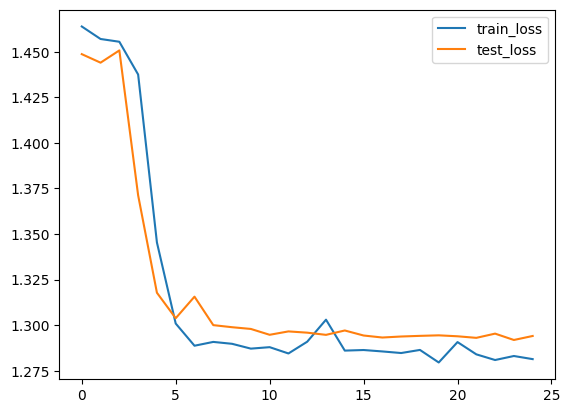

In [53]:
plt.plot(range(epochs), result_dict["train_loss"], label="train_loss")
plt.plot(range(epochs), result_dict["test_loss"], label="test_loss")
plt.legend();

##### L2 Regularization

  0%|          | 0/25 [00:00<?, ?it/s]

epoch 10 (40%) train_acc 36.61% train_loss  1.302 test_acc 35.18% test_loss 1.305
epoch 20 (80%) train_acc 36.80% train_loss  1.289 test_acc 36.29% test_loss 1.306


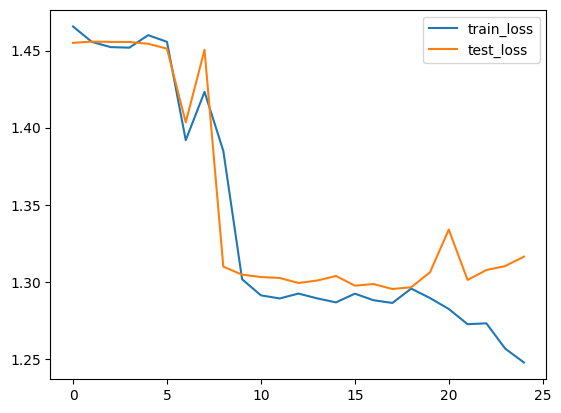

In [54]:
model_1_reg = QTAlgoModelV1(vocab_size=VOCAB_SIZE,
                            num_layers=1,
                            embedding_dim=512,
                            hidden_size=256,
                            dropout=0.1,
                            output_dim=len(CLASS_MAPPING)).to(DEVICE)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1_reg.parameters(),
                             lr=1e-3,
                             weight_decay=1e-7)

result_dict = train(model=model_1_reg,
                    train_dl=train_dl,
                    test_dl=test_dl,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs=epochs,
                    device=DEVICE)


MODEL_RESULTS["model_1_l2_reg"] = result_dict

plt.plot(range(epochs), result_dict["train_loss"], label="train_loss")
plt.plot(range(epochs), result_dict["test_loss"], label="test_loss")
plt.legend();

##### Inc Hidden Size

  0%|          | 0/25 [00:00<?, ?it/s]

epoch 10 (40%) train_acc 35.91% train_loss  1.306 test_acc 35.18% test_loss 1.307
epoch 20 (80%) train_acc 42.58% train_loss  1.223 test_acc 31.15% test_loss 1.354


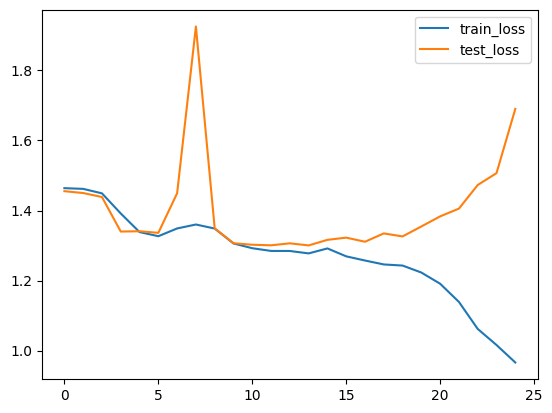

In [55]:
model_1_inc_hs = QTAlgoModelV1(vocab_size=VOCAB_SIZE,
                            num_layers=1,
                            embedding_dim=512,
                            hidden_size=512,
                            dropout=0.2,
                            output_dim=len(CLASS_MAPPING)).to(DEVICE)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1_inc_hs.parameters(),
                             lr=1e-3,
                             weight_decay=1e-7)

result_dict = train(model=model_1_inc_hs,
                    train_dl=train_dl,
                    test_dl=test_dl,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs=epochs,
                    device=DEVICE)


MODEL_RESULTS["model_1_inc_hs"] = result_dict

plt.plot(range(epochs), result_dict["train_loss"], label="train_loss")
plt.plot(range(epochs), result_dict["test_loss"], label="test_loss")
plt.legend();

### LSTM Model 2

In [58]:
class QTAlgoModelV2(nn.Module):

    def __init__(self,
                 vocab_size: int=10000,
                 embedding_dim: int=128,
                 hidden_size: int=64,
                 dropout: float=0.1,
                 num_layers=1,
                 output_dim: int=5):

        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim,
                                      padding_idx=PAD_TOKEN)
        self.dropout = nn.Dropout(p=dropout)
        self.lstm1 = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.layer_norm_1 = nn.LayerNorm(normalized_shape=hidden_size)
        self.lstm2 = nn.LSTM(input_size=hidden_size,
                             hidden_size=hidden_size//2,
                             num_layers=num_layers,
                             batch_first=True,
                             dropout=dropout)
        self.layer_norm_2 = nn.LayerNorm(normalized_shape=hidden_size//2)
        self.classifier_block = nn.Sequential(
            nn.Linear(in_features=hidden_size//2,
                      out_features=output_dim)
        )

    def forward(self,
                x: torch.Tensor) -> torch.Tensor:

        x_emb = self.embedding(x)
        x_emb = F.relu(self.dropout(x_emb))
        x_out, _ = self.layer_norm_1(self.lstm1(x_emb))
        x_out, _ = self.layer_norm_2(self.lstm2(F.relu(x_out)))
        x_out = self.classifier_block(F.relu(x_out[:, -1]))
        return x_out

#### Training

  0%|          | 0/25 [00:00<?, ?it/s]

epoch 10 (40%) train_acc 36.34% train_loss  1.295 test_acc 35.18% test_loss 1.309
epoch 20 (80%) train_acc 35.73% train_loss  1.329 test_acc 33.87% test_loss 1.372


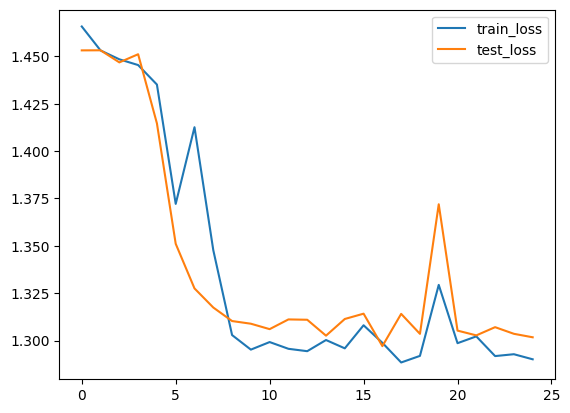

In [59]:
model_2_layer_norm = QTAlgoModelV1(vocab_size=VOCAB_SIZE,
                            num_layers=1,
                            embedding_dim=512,
                            hidden_size=256,
                            dropout=0.2,
                            output_dim=len(CLASS_MAPPING)).to(DEVICE)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2_layer_norm.parameters(),
                             lr=1e-3,
                             weight_decay=1e-7)

result_dict = train(model=model_2_layer_norm,
                    train_dl=train_dl,
                    test_dl=test_dl,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs=epochs,
                    device=DEVICE)


MODEL_RESULTS["model_2_layer_norm"] = result_dict

plt.plot(range(epochs), result_dict["train_loss"], label="train_loss")
plt.plot(range(epochs), result_dict["test_loss"], label="test_loss")
plt.legend();